In [5]:
# First Preprocced EEG signal loading


# Continue from where we left off - let's create the proper path
eeg_base_path = r'D:\impress_project\eeg_signals\data\LRMI-21679035\edffile'
print(f"\n✓ Confirmed EEG base path: {eeg_base_path}")

# Now let's load and examine the first file properly
print("\n=== LOADING FIRST EEG FILE ===")

first_file = r'D:\impress_project\eeg_signals\data\LRMI-21679035\edffile\sub-01\eeg\sub-01_task-motor-imagery_eeg.edf'
print(f"Loading: {first_file}")

try:
    raw = mne.io.read_raw_edf(first_file, preload=True, verbose=False)
    print("✓ File loaded successfully!")
    
    # Get basic information
    data, times = raw[:]
    
    print(f"\n=== BASIC INFORMATION ===")
    print(f"Subject: sub-01")
    print(f"Sampling frequency: {raw.info['sfreq']} Hz")
    print(f"Number of channels: {len(raw.ch_names)}")
    print(f"Recording duration: {raw.times[-1]:.2f} seconds")
    print(f"Total samples: {len(times)}")
    print(f"Data shape: {data.shape} (channels × time points)")
    
    print(f"\n=== CHANNEL NAMES ===")
    print("First 15 channels:")
    for i, ch in enumerate(raw.ch_names[:15]):
        print(f"  {i+1:2d}. {ch}")
    
    if len(raw.ch_names) > 15:
        print(f"  ... and {len(raw.ch_names) - 15} more channels")
    
    print(f"\n=== CHANNEL TYPES ===")
    channel_types = raw.get_channel_types()
    type_counts = {}
    for ch_type in channel_types:
        type_counts[ch_type] = type_counts.get(ch_type, 0) + 1
    
    for ch_type, count in type_counts.items():
        print(f"  {ch_type}: {count} channels")
    
    # Check for important channels
    print(f"\n=== IMPORTANT CHANNELS FOR MOTOR IMAGERY ===")
    important_channels = ['C3', 'C4', 'Cz', 'FC3', 'FC4', 'CP3', 'CP4']
    found_channels = []
    for ch in important_channels:
        if ch in raw.ch_names:
            found_channels.append(ch)
            print(f"  ✓ {ch}: Found")
        else:
            print(f"  ✗ {ch}: Not found")
    
    print(f"\nFound {len(found_channels)} out of {len(important_channels)} important motor cortex channels")
    
except Exception as e:
    print(f"✗ Error loading file: {e}")


✓ Confirmed EEG base path: D:\impress_project\eeg_signals\data\LRMI-21679035\edffile

=== LOADING FIRST EEG FILE ===
Loading: D:\impress_project\eeg_signals\data\LRMI-21679035\edffile\sub-01\eeg\sub-01_task-motor-imagery_eeg.edf
✓ File loaded successfully!

=== BASIC INFORMATION ===
Subject: sub-01
Sampling frequency: 500.0 Hz
Number of channels: 33
Recording duration: 320.00 seconds
Total samples: 160000
Data shape: (33, 160000) (channels × time points)

=== CHANNEL NAMES ===
First 15 channels:
   1. FP1
   2. FP2
   3. Fz
   4. F3
   5. F4
   6. F7
   7. F8
   8. FCz
   9. FC3
  10. FC4
  11. FT7
  12. FT8
  13. Cz
  14. C3
  15. C4
  ... and 18 more channels

=== CHANNEL TYPES ===
  eeg: 33 channels

=== IMPORTANT CHANNELS FOR MOTOR IMAGERY ===
  ✓ C3: Found
  ✓ C4: Found
  ✓ Cz: Found
  ✓ FC3: Found
  ✓ FC4: Found
  ✓ CP3: Found
  ✓ CP4: Found

Found 7 out of 7 important motor cortex channels


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\2846336833.py:15: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(first_file, preload=True, verbose=False)


In [6]:
# create a function to load all files systematically

print("\n=== CREATING COMPLETE EEG FILE INVENTORY ===")

import pandas as pd

# Create a list of all EEG files
eeg_files = []
subject_folders = []

# List all subject folders
edffile_path = r'D:\impress_project\eeg_signals\data\LRMI-21679035\edffile'
if os.path.exists(edffile_path):
    # Get all sub-* folders
    for item in os.listdir(edffile_path):
        item_path = os.path.join(edffile_path, item)
        if os.path.isdir(item_path) and item.startswith('sub-'):
            subject_folders.append(item)
    
    print(f"Found {len(subject_folders)} subject folders")
    
    # For each subject, find the EEG file
    for subject in sorted(subject_folders):
        eeg_folder = os.path.join(edffile_path, subject, 'eeg')
        if os.path.exists(eeg_folder):
            # Look for .edf files
            for file in os.listdir(eeg_folder):
                if file.endswith('.edf'):
                    full_path = os.path.join(eeg_folder, file)
                    
                    # Extract subject number
                    try:
                        subject_num = int(subject.split('-')[1])
                    except:
                        subject_num = 0
                    
                    eeg_files.append({
                        'subject_id': subject,
                        'subject_num': subject_num,
                        'file_name': file,
                        'full_path': full_path,
                        'eeg_folder': eeg_folder
                    })
    
    # Create DataFrame
    eeg_df = pd.DataFrame(eeg_files)
    
    if len(eeg_df) > 0:
        print(f"\n✓ Found {len(eeg_df)} EEG files")
        print("\nFirst 5 files:")
        print(eeg_df[['subject_id', 'file_name']].head().to_string(index=False))
        
        # Check if we have all 50 subjects
        found_subjects = eeg_df['subject_id'].nunique()
        print(f"\nSubject coverage: {found_subjects}/50 subjects")
        
        # List missing subjects if any
        all_subject_nums = set(range(1, 51))
        found_subject_nums = set(eeg_df['subject_num'])
        missing_subjects = all_subject_nums - found_subject_nums
        
        if missing_subjects:
            print(f"Missing subjects: {sorted(missing_subjects)}")
        else:
            print("✓ All 50 subjects have EEG files!")
    else:
        print("No EEG files found in the structure")
else:
    print(f"Path does not exist: {edffile_path}")


=== CREATING COMPLETE EEG FILE INVENTORY ===
Found 50 subject folders

✓ Found 50 EEG files

First 5 files:
subject_id                         file_name
    sub-01 sub-01_task-motor-imagery_eeg.edf
    sub-02 sub-02_task-motor-imagery_eeg.edf
    sub-03 sub-03_task-motor-imagery_eeg.edf
    sub-04 sub-04_task-motor-imagery_eeg.edf
    sub-05 sub-05_task-motor-imagery_eeg.edf

Subject coverage: 50/50 subjects
✓ All 50 subjects have EEG files!


In [7]:
# examine the structure of one file in detail

print("\n=== DETAILED EXAMINATION OF EEG FILE STRUCTURE ===")

if len(eeg_df) > 0:
    # Load the first file with detailed examination
    sample_row = eeg_df.iloc[0]
    print(f"Examining: {sample_row['subject_id']} - {sample_row['file_name']}")
    
    try:
        # Load the file
        raw = mne.io.read_raw_edf(sample_row['full_path'], preload=True, verbose=False)
        data, times = raw[:]
        
        print(f"\n1. DATA DIMENSIONS:")
        print(f"   Channels: {data.shape[0]}")
        print(f"   Time points: {data.shape[1]}")
        print(f"   Duration: {times[-1]:.2f} seconds")
        print(f"   Sampling rate: {raw.info['sfreq']} Hz")
        
        print(f"\n2. TIME STRUCTURE:")
        print(f"   Time array starts at: {times[0]:.2f} s")
        print(f"   Time array ends at: {times[-1]:.2f} s")
        print(f"   Time step: {times[1] - times[0]:.4f} s (expected: {1/raw.info['sfreq']:.4f} s)")
        
        print(f"\n3. CHANNEL INFORMATION:")
        # Group channels by type
        channel_info = {}
        for i, (ch_name, ch_type) in enumerate(zip(raw.ch_names, raw.get_channel_types())):
            if ch_type not in channel_info:
                channel_info[ch_type] = []
            channel_info[ch_type].append(ch_name)
        
        for ch_type, channels in channel_info.items():
            print(f"   {ch_type.upper()} channels ({len(channels)}):")
            # Print in columns
            cols = 5
            for i in range(0, len(channels), cols):
                print(f"     {', '.join(channels[i:i+cols])}")
        
        print(f"\n4. DATA STATISTICS:")
        # Calculate basic stats
        print(f"   Global mean: {data.mean():.2f} µV")
        print(f"   Global std:  {data.std():.2f} µV")
        print(f"   Min value:   {data.min():.2f} µV")
        print(f"   Max value:   {data.max():.2f} µV")
        
        # Calculate per-channel stats
        channel_means = data.mean(axis=1)
        channel_stds = data.std(axis=1)
        
        print(f"\n5. CHANNEL STATISTICS:")
        print(f"   Mean of channel means: {channel_means.mean():.2f} µV")
        print(f"   Std of channel means:  {channel_means.std():.2f} µV")
        print(f"   Mean of channel stds:  {channel_stds.mean():.2f} µV")
        print(f"   Std of channel stds:   {channel_stds.std():.2f} µV")
        
        print(f"\n6. CHECKING FOR TRIAL STRUCTURE:")
        # Based on the paper, each trial is 8 seconds (2s instruction + 4s MI + 2s break)
        # Total 40 trials per subject = 320 seconds + resting periods
        total_duration = times[-1]
        expected_duration = 320  # 40 trials × 8 seconds
        print(f"   Actual duration: {total_duration:.2f} seconds")
        print(f"   Expected (40 trials × 8s): {expected_duration} seconds")
        
        if abs(total_duration - expected_duration) < 10:
            print(f"   ✓ Duration matches expected trial structure")
        else:
            print(f"   ⚠ Duration differs from expected: {total_duration - expected_duration:.1f} seconds difference")
        
        print(f"\n7. CHECKING FOR EVENT MARKERS:")
        # Check annotations
        if hasattr(raw, 'annotations') and raw.annotations:
            print(f"   Found {len(raw.annotations)} annotations")
            unique_events = set(raw.annotations.description)
            print(f"   Event types: {unique_events}")
            
            # Show first few events
            print(f"   First 5 events:")
            for i in range(min(5, len(raw.annotations))):
                print(f"     {i+1}. Time: {raw.annotations.onset[i]:.2f}s, "
                      f"Event: {raw.annotations.description[i]}")
        else:
            print(f"   No annotations found in file")
            
            # Check for marker channels
            marker_channels = [ch for ch in raw.ch_names if 'STI' in ch or 'Status' in ch]
            if marker_channels:
                print(f"   Found marker channels: {marker_channels}")
            else:
                print(f"   No marker channels found")
                
    except Exception as e:
        print(f"✗ Error examining file: {e}")


=== DETAILED EXAMINATION OF EEG FILE STRUCTURE ===
Examining: sub-01 - sub-01_task-motor-imagery_eeg.edf

1. DATA DIMENSIONS:
   Channels: 33
   Time points: 160000
   Duration: 320.00 seconds
   Sampling rate: 500.0 Hz

2. TIME STRUCTURE:
   Time array starts at: 0.00 s
   Time array ends at: 320.00 s
   Time step: 0.0020 s (expected: 0.0020 s)

3. CHANNEL INFORMATION:
   EEG channels (33):
     FP1, FP2, Fz, F3, F4
     F7, F8, FCz, FC3, FC4
     FT7, FT8, Cz, C3, C4
     T3, T4, CPz, CP3, CP4
     TP7, TP8, Pz, P3, P4
     T5, T6, Oz, O1, O2
     HEOL, HEOR, 

4. DATA STATISTICS:
   Global mean: -0.00 µV
   Global std:  0.00 µV
   Min value:   -0.00 µV
   Max value:   0.00 µV


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\2191117557.py:12: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(sample_row['full_path'], preload=True, verbose=False)



5. CHANNEL STATISTICS:
   Mean of channel means: -0.00 µV
   Std of channel means:  0.00 µV
   Mean of channel stds:  0.00 µV
   Std of channel stds:   0.00 µV

6. CHECKING FOR TRIAL STRUCTURE:
   Actual duration: 320.00 seconds
   Expected (40 trials × 8s): 320 seconds
   ✓ Duration matches expected trial structure

7. CHECKING FOR EVENT MARKERS:
   No annotations found in file
   No marker channels found



=== VISUALIZING THE EEG DATA ===


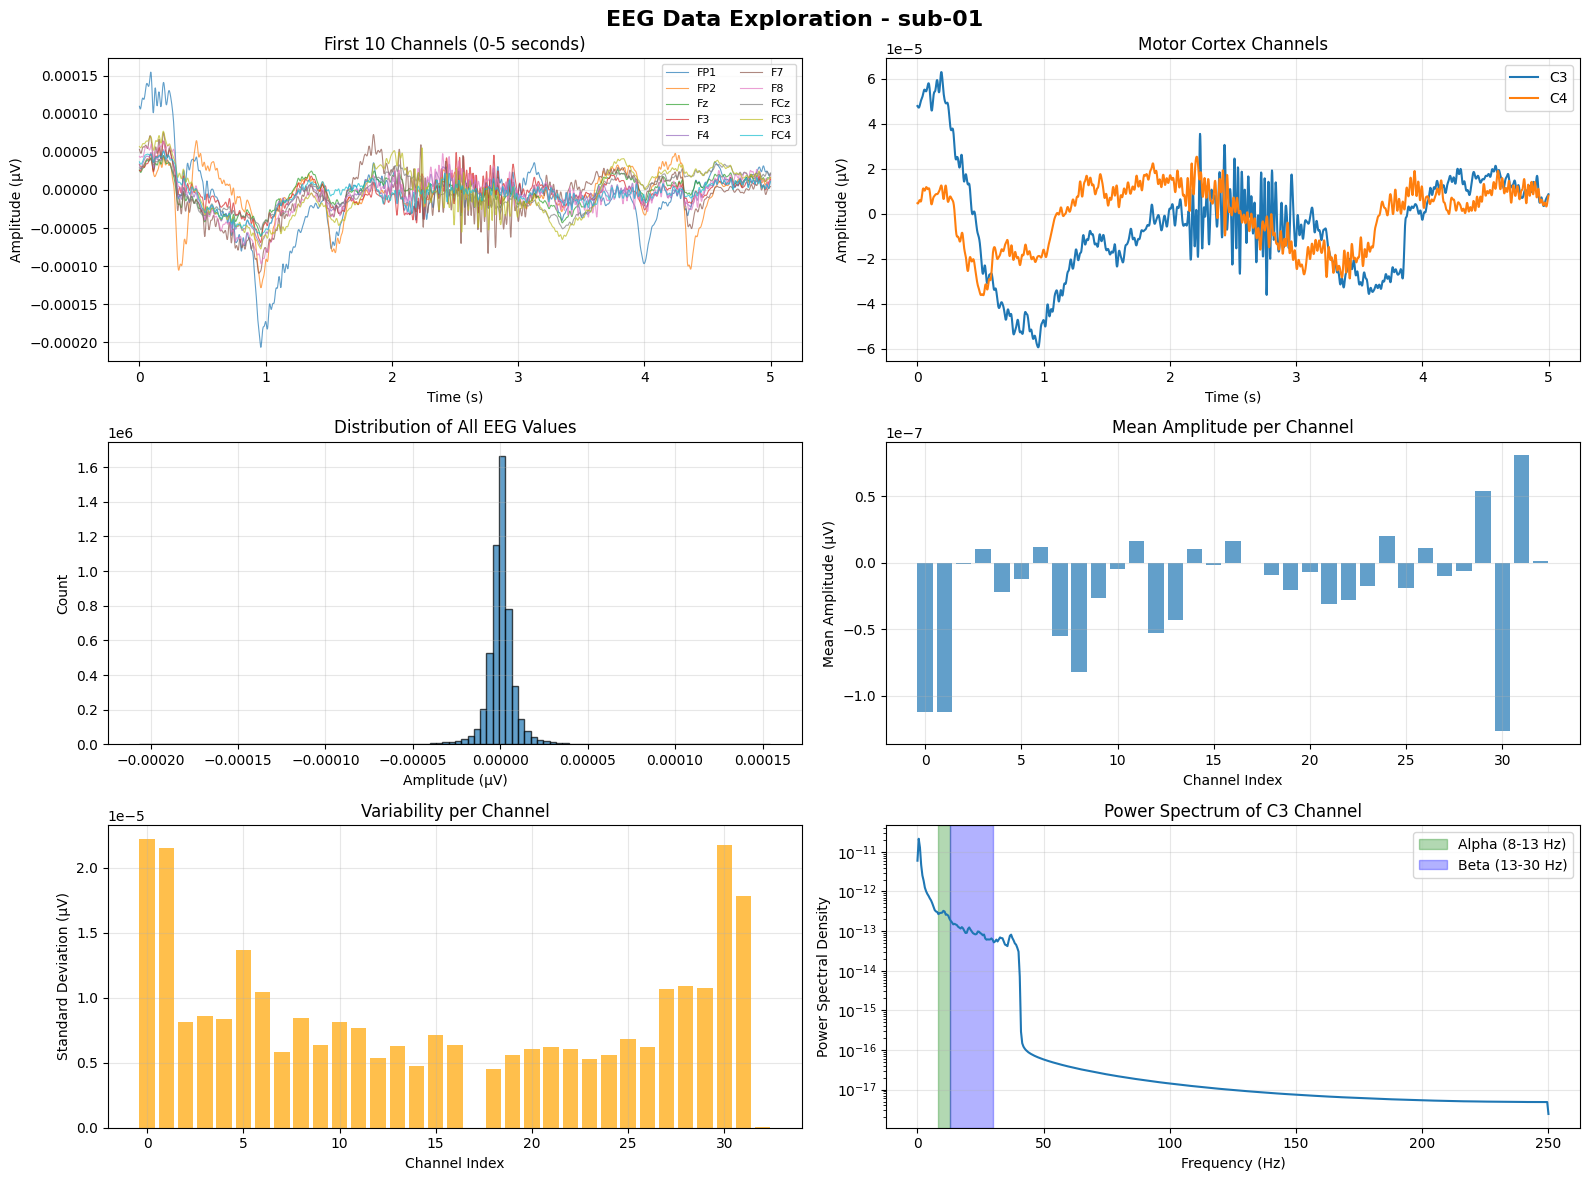


✓ Visualization complete!


In [8]:
# visualize the data

print("\n=== VISUALIZING THE EEG DATA ===")

if 'raw' in locals() and 'data' in locals():
    # Create a comprehensive visualization
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle(f'EEG Data Exploration - {sample_row["subject_id"]}', fontsize=16, fontweight='bold')
    
    # 1. Raw signal (first 5 seconds of first 10 channels)
    start_time = 0
    end_time = 5
    start_sample = int(start_time * raw.info['sfreq'])
    end_sample = int(end_time * raw.info['sfreq'])
    
    n_channels_to_plot = min(10, len(raw.ch_names))
    for i in range(n_channels_to_plot):
        axes[0, 0].plot(times[start_sample:end_sample], 
                       data[i, start_sample:end_sample],
                       label=raw.ch_names[i], alpha=0.7, linewidth=0.8)
    axes[0, 0].set_xlabel('Time (s)')
    axes[0, 0].set_ylabel('Amplitude (µV)')
    axes[0, 0].set_title(f'First {n_channels_to_plot} Channels (0-5 seconds)')
    axes[0, 0].legend(fontsize=8, ncol=2)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Motor cortex channels if available
    motor_channels = ['C3', 'C4']
    motor_data = {}
    for ch in motor_channels:
        if ch in raw.ch_names:
            idx = raw.ch_names.index(ch)
            motor_data[ch] = data[idx, start_sample:end_sample]
    
    if motor_data:
        for ch_name, ch_data in motor_data.items():
            axes[0, 1].plot(times[start_sample:end_sample], ch_data,
                           label=ch_name, linewidth=1.5)
        axes[0, 1].set_xlabel('Time (s)')
        axes[0, 1].set_ylabel('Amplitude (µV)')
        axes[0, 1].set_title('Motor Cortex Channels')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
    else:
        axes[0, 1].text(0.5, 0.5, 'C3/C4 not found', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Motor Cortex Channels (Not Found)')
    
    # 3. Histogram of all data values
    axes[1, 0].hist(data.flatten(), bins=100, edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Amplitude (µV)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Distribution of All EEG Values')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Channel means
    channel_means = data.mean(axis=1)
    axes[1, 1].bar(range(len(channel_means)), channel_means, alpha=0.7)
    axes[1, 1].set_xlabel('Channel Index')
    axes[1, 1].set_ylabel('Mean Amplitude (µV)')
    axes[1, 1].set_title('Mean Amplitude per Channel')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 5. Channel standard deviations
    channel_stds = data.std(axis=1)
    axes[2, 0].bar(range(len(channel_stds)), channel_stds, alpha=0.7, color='orange')
    axes[2, 0].set_xlabel('Channel Index')
    axes[2, 0].set_ylabel('Standard Deviation (µV)')
    axes[2, 0].set_title('Variability per Channel')
    axes[2, 0].grid(True, alpha=0.3)
    
    # 6. Power spectrum of C3 (if available)
    if 'C3' in raw.ch_names:
        from scipy import signal
        c3_idx = raw.ch_names.index('C3')
        c3_data = data[c3_idx, :]
        
        # Calculate power spectrum
        f, Pxx = signal.welch(c3_data, fs=raw.info['sfreq'], nperseg=1024)
        
        axes[2, 1].semilogy(f, Pxx)
        axes[2, 1].set_xlabel('Frequency (Hz)')
        axes[2, 1].set_ylabel('Power Spectral Density')
        axes[2, 1].set_title('Power Spectrum of C3 Channel')
        
        # Highlight alpha and beta bands
        axes[2, 1].axvspan(8, 13, alpha=0.3, color='green', label='Alpha (8-13 Hz)')
        axes[2, 1].axvspan(13, 30, alpha=0.3, color='blue', label='Beta (13-30 Hz)')
        axes[2, 1].legend()
        axes[2, 1].grid(True, alpha=0.3)
    else:
        axes[2, 1].text(0.5, 0.5, 'C3 channel not available\nfor power spectrum',
                       ha='center', va='center', transform=axes[2, 1].transAxes)
        axes[2, 1].set_title('Power Spectrum (C3 Not Found)')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Visualization complete!")
else:
    print("No data available for visualization")

In [9]:
# save our findings



print("\n=== SAVING EEG DATA SUMMARY ===")

# Create a summary DataFrame for all files (without loading them all)
all_files_summary = []

print("Creating summary for all EEG files...")
for idx, row in eeg_df.iterrows():
    try:
        # Load just the info (not the data) for speed
        raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
        
        summary = {
            'subject_id': row['subject_id'],
            'subject_num': row['subject_num'],
            'file_name': row['file_name'],
            'n_channels': len(raw_temp.ch_names),
            'sfreq': raw_temp.info['sfreq'],
            'duration': raw_temp.times[-1] if hasattr(raw_temp, 'times') and len(raw_temp.times) > 0 else None,
            'has_C3': 'C3' in raw_temp.ch_names,
            'has_C4': 'C4' in raw_temp.ch_names,
            'has_Cz': 'Cz' in raw_temp.ch_names,
            'n_eeg_channels': sum(1 for t in raw_temp.get_channel_types() if t == 'eeg'),
            'n_eog_channels': sum(1 for t in raw_temp.get_channel_types() if t == 'eog'),
            'n_misc_channels': sum(1 for t in raw_temp.get_channel_types() if t == 'misc'),
            'has_annotations': hasattr(raw_temp, 'annotations') and bool(raw_temp.annotations)
        }
        
        all_files_summary.append(summary)
        
        if (idx + 1) % 10 == 0:
            print(f"  Processed {idx + 1}/{len(eeg_df)} files")
            
    except Exception as e:
        print(f"  Error with {row['subject_id']}: {e}")
        all_files_summary.append({
            'subject_id': row['subject_id'],
            'error': str(e)
        })

# Create summary DataFrame
summary_df = pd.DataFrame(all_files_summary)

if len(summary_df) > 0:
    print(f"\n✓ Created summary for {len(summary_df)} files")
    
    # Save to CSV
    summary_path = os.path.join(base_dir, 'eeg_files_summary.csv')
    summary_df.to_csv(summary_path, index=False)
    print(f"Summary saved to: {summary_path}")
    
    # Display key statistics
    print(f"\n=== KEY STATISTICS ===")
    print(f"Average channels per file: {summary_df['n_channels'].mean():.1f}")
    print(f"Average sampling frequency: {summary_df['sfreq'].mean():.1f} Hz")
    print(f"Average duration: {summary_df['duration'].mean():.1f} seconds")
    print(f"Files with C3: {summary_df['has_C3'].sum()}/{len(summary_df)}")
    print(f"Files with C4: {summary_df['has_C4'].sum()}/{len(summary_df)}")
    print(f"Files with annotations: {summary_df['has_annotations'].sum()}/{len(summary_df)}")
    
    # Check consistency
    print(f"\n=== CONSISTENCY CHECK ===")
    if summary_df['n_channels'].nunique() == 1:
        print(f"✓ All files have same number of channels: {summary_df['n_channels'].iloc[0]}")
    else:
        print(f"⚠ Channel counts vary: {summary_df['n_channels'].unique()}")
        
    if summary_df['sfreq'].nunique() == 1:
        print(f"✓ All files have same sampling frequency: {summary_df['sfreq'].iloc[0]} Hz")
    else:
        print(f"⚠ Sampling frequencies vary: {summary_df['sfreq'].unique()}")
        
    # Save a sample of the summary
    print(f"\nSample of the summary:")
    print(summary_df.head(10).to_string())


=== SAVING EEG DATA SUMMARY ===
Creating summary for all EEG files...
  Processed 10/50 files


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following 

  Processed 20/50 files
  Processed 30/50 files


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following 

  Processed 40/50 files
  Processed 50/50 files

✓ Created summary for 50 files
Summary saved to: D:/impress_project/eeg_signals/data/LRMI-21679035\eeg_files_summary.csv

=== KEY STATISTICS ===
Average channels per file: 33.0
Average sampling frequency: 500.0 Hz
Average duration: 320.0 seconds
Files with C3: 50/50
Files with C4: 50/50
Files with annotations: 0/50

=== CONSISTENCY CHECK ===
✓ All files have same number of channels: 33
✓ All files have same sampling frequency: 500.0 Hz

Sample of the summary:
  subject_id  subject_num                          file_name  n_channels  sfreq  duration  has_C3  has_C4  has_Cz  n_eeg_channels  n_eog_channels  n_misc_channels  has_annotations
0     sub-01            1  sub-01_task-motor-imagery_eeg.edf          33  500.0   319.998    True    True    True              33               0                0            False
1     sub-02            2  sub-02_task-motor-imagery_eeg.edf          33  500.0   319.998    True    True    True              

C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw_temp = mne.io.read_raw_edf(row['full_path'], preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\3383384312.py:14: RuntimeWarning: Physical range is not defined in following 

In [ ]:
# check motor cortex channels across all files

print("\n=== VERIFYING MOTOR CORTEX CHANNELS ===")

# Check the first few files
for i in range(min(5, len(eeg_df))):
    file_path = eeg_df.iloc[i]['full_path']
    subject = eeg_df.iloc[i]['subject_id']
    
    try:
        raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
        
        has_c3 = 'C3' in raw.ch_names
        has_c4 = 'C4' in raw.ch_names
        
        print(f"{subject}: C3={has_c3}, C4={has_c4}")
        
        # If missing, check what channels ARE available
        if not has_c3 or not has_c4:
            print(f"  Available channels starting with C: {[ch for ch in raw.ch_names if ch.startswith('C')]}")
            
    except Exception as e:
        print(f"{subject}: Error - {e}")

# Also check electrode positions if available
electrodes_path = os.path.join(base_dir, 'task-motor-imagery_electrodes.tsv')
if os.path.exists(electrodes_path):
    electrodes_df = pd.read_csv(electrodes_path, sep='\t')
    print(f"\nElectrode positions file found:")
    print(f"Contains C3: {'C3' in electrodes_df['name'].values}")
    print(f"Contains C4: {'C4' in electrodes_df['name'].values}")


=== VERIFYING MOTOR CORTEX CHANNELS ===


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\1323022164.py:9: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)


sub-01: C3=True, C4=True
sub-02: C3=True, C4=True
sub-03: C3=True, C4=True
sub-04: C3=True, C4=True
sub-05: C3=True, C4=True


C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\1323022164.py:9: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\1323022164.py:9: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\1323022164.py:9: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
C:\Users\Mo\AppData\Local\Temp\ipykernel_16888\1323022164.py:9: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)



Electrode positions file found:
Contains C3: True
Contains C4: True
